PCA is an unsupervised machine learning algorithm. PCA is mainly used for dimensionality reduction in a dataset consisting of many variables that are highly correlated or lightly correlated with each other while retaining the variation present in the dataset up to a maximum extent. It is also a great tool for exploratory data analysis for making predictive models. 


PCA performs a linear transformation on the data so that most of the variance or information in your high-dimensional dataset is captured by the first few principal components. The first principal component will capture the most variance, followed by the second principal component, and so on. 

PCA step by step
Here is the short summary of the required steps:

1. Scale the data — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters (sorry US readers)
2. Calculate covariance matrix — square matrix giving the covariances between each pair of elements of a random vector
2. Eigendecomposition — we’ll get to that

So let’s start with the first (and easiest) one.

Before implementing the PCA algorithm in python first you have to download the wine data set. Below attach source contains a file of the wine dataset so download first to proceed https://gist.github.com/tijptjik/9408623

In [143]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# importing or loading the dataset 
df = pd.read_csv('Wine.csv') 
  
df.head()

,alcohol,Malic.acid,ash,acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,W1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,W1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,W1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,W1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,W1


To perform the scaling we'll use the StandardScaler from Scikit-Learn:

In [147]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:14]
y = df['Wine']

Let's take a step back here and understand the difference between variance and covariance. Variance reports variation of a single random variable — let's say the weight of a person, and covariance reports how much two random variables vary — like weight and height of a person.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances.
Let's not dive into the math here as you have the video for that part. Here’s how to obtain the covariance matrix in Numpy:

In [148]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:14]


array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27550299, -0.27833221],
       [-0.21036119,  0.272328

As you can see, the diagonal elements are identical, and the matrix is symmetrical. Up next, eigendecomposition.

Eigen decomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues. Eigenvectors are simple unit vectors, and eigenvalues are coefficients which give the magnitude to the eigenvectors. We can perform the eigendecomposition through Numpy, and it returns a tuple, where the first element represents eigenvalues and the second one represents eigenvectors:

In [149]:
values, vectors = np.linalg.eig(cov_matrix)
values[:14]

array([5.22481203, 2.19248152, 1.42766455, 0.85344884, 0.8933034 ,
       0.67313409, 0.55544776, 0.06974017, 0.35046681, 0.13626767,
       0.17052069, 0.26523921, 0.2609196 ])

In [150]:
vectors[:14]

array([[ 0.40061817, -0.04279021,  0.00708557,  0.21190105,  0.03080887,
         0.2193226 , -0.07268782, -0.59091266, -0.07685082,  0.55339048,
         0.02580389,  0.2743453 ,  0.03362564],
       [-0.10049402,  0.51253006, -0.27225172, -0.35319835, -0.08073149,
        -0.19011851, -0.05575462, -0.15250658, -0.49408424,  0.13036619,
         0.30687102, -0.14143787,  0.28987116],
       [ 0.24178099,  0.22282037,  0.0525294 ,  0.2836428 , -0.46836582,
        -0.56131196,  0.37138698,  0.02748997, -0.08327859, -0.07696492,
        -0.13095335,  0.2838093 , -0.15812463],
       [ 0.01824048,  0.37109424,  0.60356874, -0.25299635,  0.09305826,
        -0.13462324, -0.15318175, -0.02375467,  0.17797065,  0.25116393,
         0.09172891, -0.18834719, -0.49416196],
       [ 0.22230116,  0.00643925,  0.62228794,  0.16220375, -0.04684966,
         0.11474319, -0.29090643,  0.13530607, -0.3967539 , -0.28912012,
         0.00639521,  0.08374082,  0.41308074],
       [-0.107407  ,  0.354650

Just from this, we can calculate the percentage of explained variance per principal component:

In [161]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)


1.0000000000000002 
 [0.3996507040997861, 0.16770493874108458, 0.10920338201069844, 0.0652810910857892, 0.06832960355691109, 0.05148864937930976, 0.0424867125160211, 0.005334490034152581, 0.02680753005109357, 0.010423239766716521, 0.013043285425734059, 0.020288392103840428, 0.019957981228862644]


The first value is just the sum of explained variances — and must be equal to 1. The second value is an array, representing the explained variance percentage per principal component.
The first two principal components account for around 56% of the variance in the data. 
Let's now dive into some visualizations where we can see the clear purpose of applying PCA.

after applying PCA we've managed to explain most?? of the variance with only 2 principal components.
Now we'll create a Pandas DataFrame object consisting of those two components, alongside the target class. Here's the code:

In [164]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-3.260580,1.736054,W1
1,-2.358620,-0.509786,W1
2,-2.453376,1.120704,W1
3,-3.253148,2.686416,W1
4,-1.403734,1.320100,W1


et’s first visualize this dataset in 1 dimension — as a line. To do so we’ll need to ditch the second principal component. The easiest way is to hardcode Y values as zeros, as the scatter plot requires values for both X and Y axis:

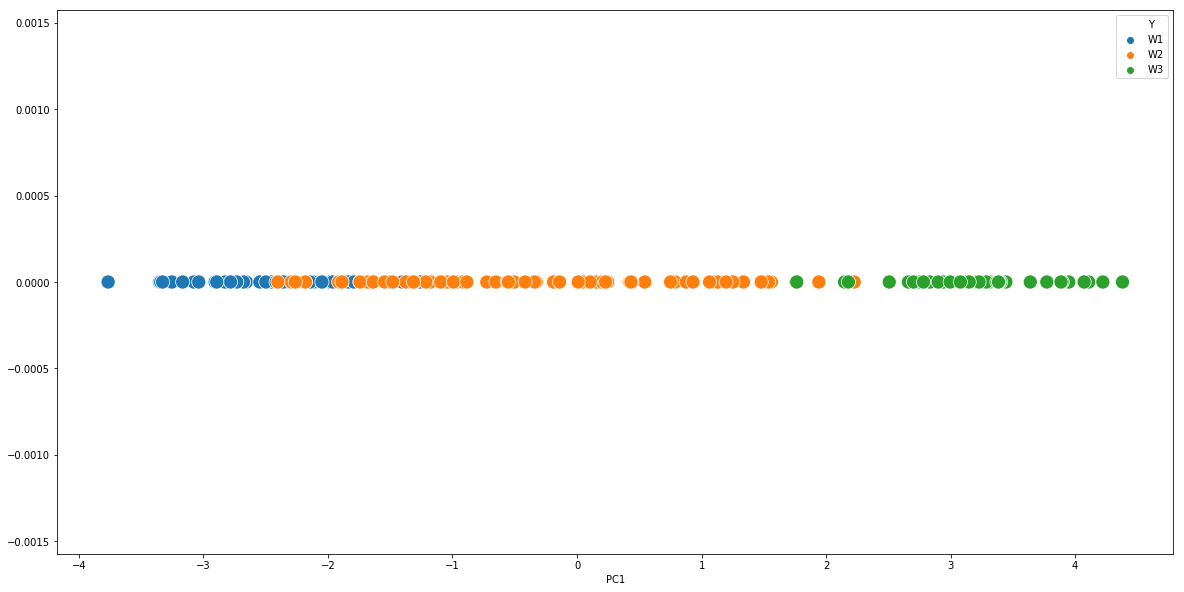

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

Just look at how separable the w3 class is. w1 and w2 are tougher to classify, but we should still get most of the classifications correct only with a single principal component.
Let’s now see how this looks in a 2D space:

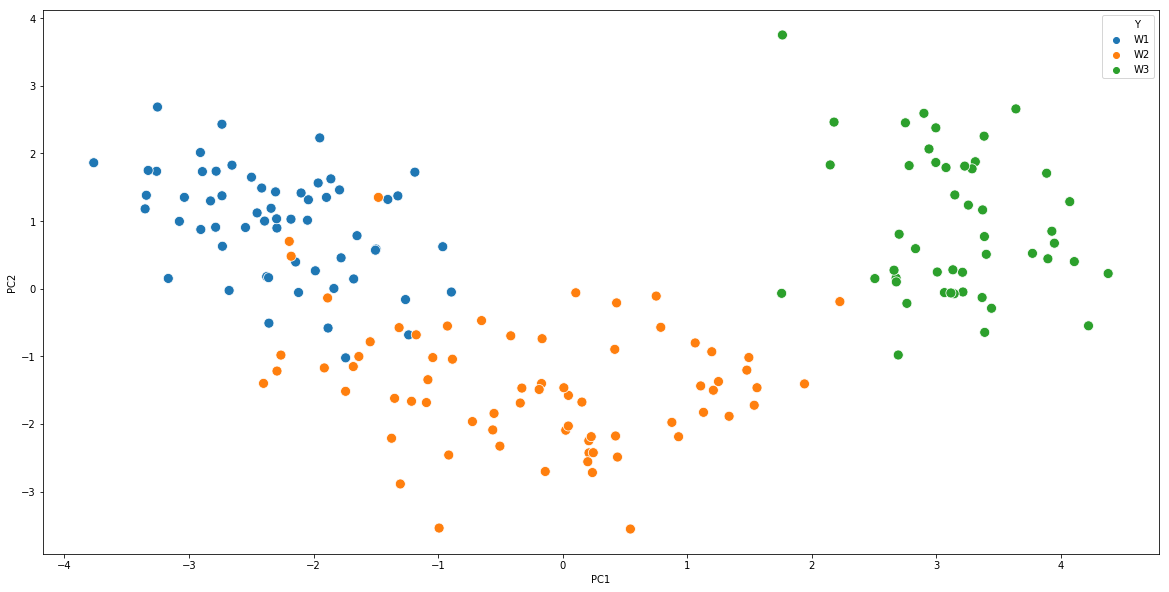

In [171]:
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)